In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
# Read the audio file
y, sr = librosa.load(r'C:\Users\ibnes\OneDrive\Documents\Sound Recordings\Sampling.wav')

# Define frame size and overlap (in samples)
frame_size = 256
overlap = 128
# Calculate number of frames
num_frames = len(y) // (frame_size - overlap)

In [3]:
# Initialize variables
voiced_frames = []
unvoiced_frames = []
silence_frames = []
# Iterate through each frame
for i in range(num_frames):
    # Extract current frame
    start = (i) * (frame_size - overlap)
    end = start + frame_size
    frame = y[start:end]
    # Calculate energy of the frame
    energy = np.sum(np.abs(frame) ** 2)
    # Calculate zero-crossing rate (ZCR)
    zcr = np.sum(np.diff(np.sign(frame)) != 0)
    # Thresholds for voiced, unvoiced, and silence detection
    voiced_threshold = 0.01 * np.max(energy)  # adjust threshold based on your audio
    unvoiced_threshold = 0.001 * np.max(energy)  # adjust threshold based on your audio
    silence_threshold = 0.0001 * np.max(energy)  # adjust threshold based on your audio
    # Identify frame type based on energy and ZCR
    if energy > voiced_threshold and zcr > 10:  # adjust values for voiced detection
        voiced_frames.append(i)
    elif energy > unvoiced_threshold and zcr < 10:  # adjust values for unvoiced detection
        unvoiced_frames.append(i)
    else:
        silence_frames.append(i)

# Calculate time axis for plotting
time_axis = np.arange(0, len(y)) / sr


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


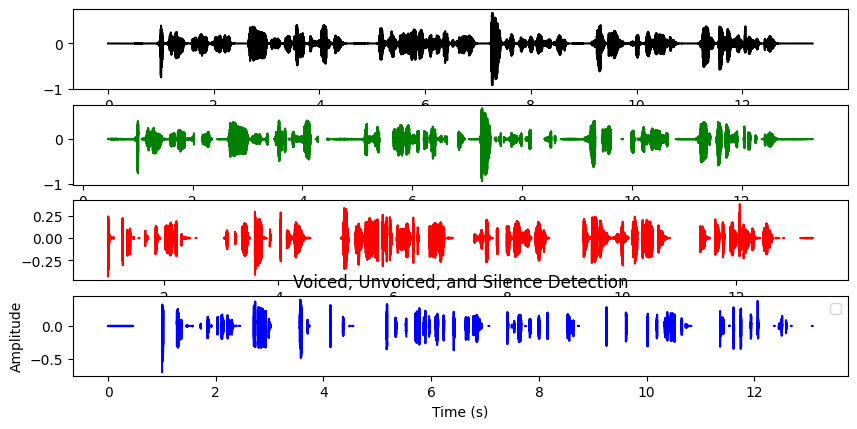

In [11]:
# Plot original signal
plt.figure(figsize=(10, 6))
plt.subplot(5, 1, 2)
plt.plot(time_axis, y, 'k', label='Original Signal')  # black for original signal

# Plot voiced segments
for i in voiced_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.subplot(5, 1, 3)
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'g')

# Plot unvoiced segments
for i in unvoiced_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.subplot(5, 1, 4)
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'r')

# Plot silence segments
for i in silence_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.subplot(5, 1, 5)
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'b')
    
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Voiced, Unvoiced, and Silence Detection')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


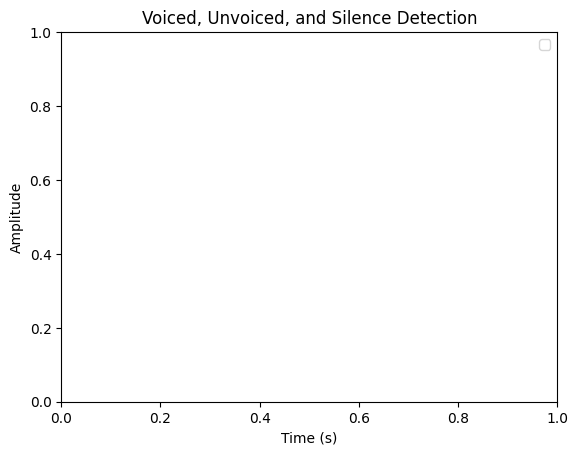

In [12]:
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Voiced, Unvoiced, and Silence Detection')
plt.legend()
plt.show()